In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
import Thermobar as pt
pf.__version__

'1.0.11'

In [35]:
df_Raman_all=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
                          sheet_name='Room_temp_drift')
df_Raman=df_Raman_all

In [36]:
F23=df_Raman_all.loc[df_Raman_all['filename'].str.contains('B23')]
Diff_F23=Diff.loc[df_Raman_all['filename'].str.contains('B23')]
F30=df_Raman_all.loc[df_Raman_all['filename'].str.contains('B30')]
Diff_F30=Diff.loc[df_Raman_all['filename'].str.contains('B30')]

## Lets do this hypothetically as a function of all splits.


In [37]:
df_Raman['preferred_values'].iloc[0]

0.9977080557151953

(-0.01, 0.01)

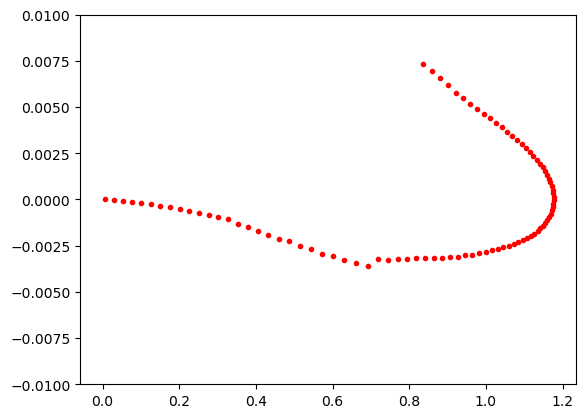

In [38]:
Split=pd.Series(np.linspace(103, 109, 100))
df_with_corr_test=pf.calculate_density_ucb(corrected_split=Split*df_Raman['preferred_values'], split_err=0
)


df_no_corr_test=pf.calculate_density_ucb(corrected_split=Split*df_Raman['preferred_values'].iloc[0], split_err=0
)



plt.plot(df_with_corr_test['Density g/cm3'], df_with_corr_test['Density g/cm3']-df_no_corr_test['Density g/cm3'], '.r')
plt.ylim([-0.01, 0.01])
#plt.plot(Split, df_no_corr_test['Density g/cm3'], '.k')

## Lets see how big a correction we actually expect

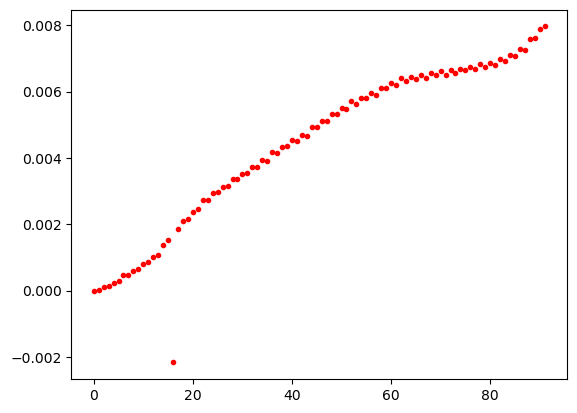

In [39]:
df_with_corr=pf.calculate_density_ucb(corrected_split=df_Raman['Splitting']*df_Raman['preferred_values'], split_err=0
)
df_with_corr.head()

df_no_corr=pf.calculate_density_ucb(corrected_split=df_Raman['Splitting']*(df_Raman['preferred_values'].iloc[0]), split_err=0
)
df_no_corr.head()

Diff=df_no_corr['Density g/cm3']-df_with_corr['Density g/cm3']
plt.plot(Diff.index, Diff, '.r')

In [40]:
df_with_corr['Notes'].to_clipboard(excel=True)

In [41]:
df_Raman['Splitting'].to_clipboard(excel=True)

In [42]:
test=df_Raman['Splitting']*(df_Raman['preferred_values'].iloc[0])
test.to_clipboard(excel=True)

In [43]:
len(Diff)

92

In [44]:
df_no_corr.tail()

,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Preferred D_σ_Ne,Preferred D_σ_pkfit,in range,Notes,LowD_RT,HighD_RT,LowD_SC,LowD_SC_σ,MedD_SC,MedD_SC_σ,HighD_SC,HighD_SC_σ,Temperature
87,0.746877,0.001602,0.0,0.001602,104.455913,0,0,Y,"SupCrit, high density",NaN,NaN,0.675850,0.009066,0.757120,0.002409,0.746877,0.001602,SupCrit
88,0.733617,0.001605,0.0,0.001605,104.425203,0,0,Y,"SupCrit, high density",NaN,NaN,0.663682,0.008911,0.741006,0.002404,0.733617,0.001605,SupCrit
89,0.744204,0.001602,0.0,0.001602,104.449685,0,0,Y,"SupCrit, high density",NaN,NaN,0.673382,0.009034,0.753841,0.002408,0.744204,0.001602,SupCrit
90,0.736046,0.001604,0.0,0.001604,104.430795,0,0,Y,"SupCrit, high density",NaN,NaN,0.665897,0.008939,0.743931,0.002405,0.736046,0.001604,SupCrit
91,0.744793,0.001602,0.0,0.001602,104.451056,0,0,Y,"SupCrit, high density",NaN,NaN,0.673926,0.009041,0.754563,0.002408,0.744793,0.001602,SupCrit


In [45]:
import pandas as pd

df_19=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Temp_Tests_Apr2025\RoomT_Test_Charlotte_TagTeam\Aranet_CharlottePenny.xlsx',
sheet_name='Aranet4 18C45')



# Find the column with the heading like "Time(DD/MM/YYYY H:mm:ss)"
# Let's assume it's exactly named this:
time_col = 'Time(DD/MM/YYYY H:mm:ss)'

for df in [df_19]:
# Convert to datetime
    df[time_col] = pd.to_datetime(df[time_col], dayfirst=True)

    # Calculate seconds after midnight
    df['secs_after_midnight'] = (
        df[time_col].dt.hour * 3600 +
        df[time_col].dt.minute * 60 +
        df[time_col].dt.second
    )

#df_19=df_19.loc[df_19['secs_after_midnight']>35000]

In [46]:
df_Ne=pd.read_excel('Neon_Charlotte_pennyroom.xlsx')
df_Ne.columns

Index(['Unnamed: 0', 'filename_x', 'Ne_Corr', '1σ_Ne_Corr', 'deltaNe',
       'pk2_peak_cent', 'pk1_peak_cent', 'pk2_amplitude', 'pk1_amplitude',
       'residual_pk2', 'residual_pk1', '1σ_Ne_Corr_test', 'pk2_sigma',
       'pk2_gamma', 'error_pk2', 'Peak2_Prop_Lor', 'pk1_sigma', 'pk1_gamma',
       'error_pk1', 'Peak1_Prop_Lor', 'Ne_Corr_min', 'Ne_Corr_max',
       'residual_pk1+pk2', 'error_pk1_amplitude', 'error_pk2_amplitude',
       'name_for_matching', 'filename_y', 'date', 'Month', 'Day', 'power (mW)',
       'Int_time (s)', 'accumulations', 'Mag (X)', 'duration', '24hr_time',
       'sec since midnight', 'Spectral Center'],
      dtype='object')

c:\Users\penny\anaconda3\Lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\penny\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\penny\AppData\Local\Temp\ipykernel_32704\2189593588.py:51: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, N_degree)
C:\Users\penny\AppData\Local\Temp\ipykernel_32704\2189593588.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F30['Temp']=poly_temp(F30['sec since midnight'])
C:\Users\penny\AppData\Local\Temp\ipykernel_32704\2189593588.py:89: SettingWithCopyWarning: 
A va

stats B30
R2=0.14244
Grad=[0.01006632]
R2=0.56887
Grad=[0.03044795]
stats B23
R2=0.39767
Grad=[0.01542293]
R2=0.73515
Grad=[0.03668906]


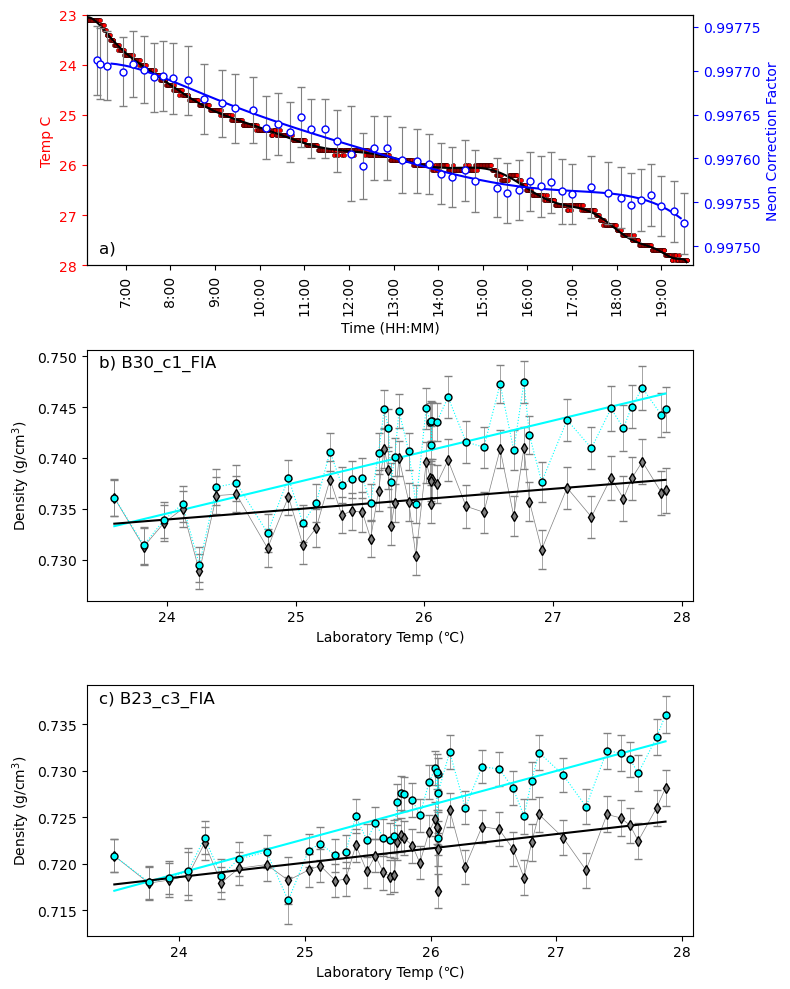

In [47]:
import matplotlib.ticker as ticker
import datetime

# Define formatter function
def seconds_to_time(x, pos):
    return str(datetime.timedelta(seconds=int(x)))[:-3]  # HH:MM

# Your plot
fig, (ax1, ax1b, ax1c) = plt.subplots(3, 1, figsize = (8,10))

ax1.plot(df_19['secs_after_midnight'], df_19['Temperature(°C)'], 'o', mfc='red', mec='k', mew=0.3, ms=3,  label='Aranet4')
#ax1.plot(df_temp['secs_after_midnight'], df_temp['Temp'], '-b', label='Laser Table')
ax2=ax1.twinx()
ax2.errorbar(df_Ne['sec since midnight'], df_Ne['Ne_Corr'], xerr=0, yerr=df_Ne['1σ_Ne_Corr'].fillna(0).infer_objects(),
             fmt='o', ecolor='grey', elinewidth=0.8, mfc='white', ms=5, mec='b',capsize=3)
 




ax2.plot(df_Raman['sec since midnight'], df_Raman['preferred_values'], '-b', label='NeCorrFactor')

# Set xlim
ax1.set_xlim([
     np.min(df_Raman['sec since midnight']-2000),
     np.max(df_Raman['sec since midnight']+1000)
     ])

# Set ylims and labels
ax1.set_ylim([28, 23])
ax1.set_xlabel('Time (HH:MM)')
ax1.set_ylabel('Temp C', color='red')
ax2.set_ylabel('Neon Correction Factor', color='blue')

# Apply the time formatter
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(seconds_to_time))

# Optional: set major ticks every hour
ax1.xaxis.set_major_locator(ticker.MultipleLocator(3600))
ax1.tick_params(axis='x', rotation=90)

## Lets set up a regression to parameterize

x=df_19['secs_after_midnight']-60
y=(df_19['Temperature(°C)'])

# Degree of polynomial
N_degree = 50

# Fit polynomial
coeffs = np.polyfit(x, y, N_degree)

# Create polynomial function
poly_temp = np.poly1d(coeffs)

# 2. Predict temperature at F30 times
test = poly_temp(x)

#ax1.plot(x, y, '-k')
ax1.plot(x, test, '-k')

ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

## Lets plot the Neon correction factor model

ax2.plot()

## Now lets plot the others 

F30['Temp']=poly_temp(F30['sec since midnight'])



ax1b.errorbar(F30['Temp'], F30['Density g/cm3'], xerr=0, 
yerr=F30['σ Density g/cm3'],
             fmt='d', ecolor='grey', elinewidth=0.5, mfc='grey', ms=5, mec='k', capsize=3, label='B30')


ax1b.errorbar(F30['Temp'], F30['Density g/cm3']+Diff_F30, xerr=0, 
yerr=F30['σ Density g/cm3'],
             fmt='o', ecolor='grey', elinewidth=0.5, mfc='cyan', ms=5, mec='k', capsize=3, label='B30')

ax1b.plot(F30['Temp'], F30['Density g/cm3'], '-', c='grey', lw=0.5)
ax1b.plot(F30['Temp'], F30['Density g/cm3']+Diff_F30, ':', c='cyan', label='No Ne corr', lw=0.8)
ax1b.set_xlabel('Laboratory Temp (℃)')
ax1b.set_ylabel('Density (g/cm$^{3}$)')

F23['Temp']=poly_temp(F23['sec since midnight'])



ax1c.errorbar(F23['Temp'], F23['Density g/cm3'], xerr=0, 
yerr=F23['σ Density g/cm3'],
             fmt='d', ecolor='grey', elinewidth=0.5, mfc='grey', ms=5, mec='k', capsize=3, label='B30')


ax1c.errorbar(F23['Temp'], F23['Density g/cm3']+Diff_F23, xerr=0, 
yerr=F23['σ Density g/cm3'],
             fmt='o', ecolor='grey', elinewidth=0.5, mfc='cyan', ms=5, mec='k', capsize=3, label='B30')

ax1c.plot(F23['Temp'], F23['Density g/cm3'], '-', c='grey', lw=0.5)
ax1c.plot(F23['Temp'], F23['Density g/cm3']+Diff_F23, ':', c='cyan', label='No Ne corr', lw=0.8)
ax1c.set_xlabel('Laboratory Temp (℃)')
ax1c.set_ylabel('Density (g/cm$^{3}$)')

ax1.annotate("a)", xy=(0.02, 0.05), xycoords="axes fraction", fontsize=12)
ax1b.annotate("b) B30_c1_FIA", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=12)
ax1c.annotate("c) B23_c3_FIA", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=12)



stats_R30_NeCorr=pt.calculate_R2(F30['Temp'], F30['Density g/cm3'])
print('stats B30')
print('R2='+str(stats_R30_NeCorr['R2']))
print('Grad='+str(stats_R30_NeCorr['Grad']*10))

stats_R30_NoNeCorr=pt.calculate_R2(F30['Temp'], F30['Density g/cm3']+Diff_F30)
stats_R30_NoNeCorr
print('R2='+str(stats_R30_NoNeCorr['R2']))
print('Grad='+str(stats_R30_NoNeCorr['Grad']*10))

ax1b.plot(stats_R30_NoNeCorr['x_pred'],stats_R30_NoNeCorr['y_pred'], '-', color='cyan')
ax1b.plot(stats_R30_NeCorr['x_pred'],stats_R30_NeCorr['y_pred'], '-k')

stats_R23_NeCorr=pt.calculate_R2(F23['Temp'], F23['Density g/cm3'])
print('stats B23')
print('R2='+str(stats_R23_NeCorr['R2']))
print('Grad='+str(stats_R23_NeCorr['Grad']*10))

stats_R23_NoNeCorr=pt.calculate_R2(F23['Temp'], F23['Density g/cm3']+Diff_F23)
stats_R23_NoNeCorr
print('R2='+str(stats_R23_NoNeCorr['R2']))
print('Grad='+str(stats_R23_NoNeCorr['Grad']*10))

ax1c.plot(stats_R23_NoNeCorr['x_pred'],stats_R23_NoNeCorr['y_pred'], '-', color='cyan')
ax1c.plot(stats_R23_NeCorr['x_pred'],stats_R23_NeCorr['y_pred'], '-k')

fig.tight_layout()
fig.savefig('TepmTesting.png', dpi=300)